# Project 1 Starter Notebook

This notebook is meant to help you start up easily.
It will assume you have downloaded the relevant data.
For more information about the competition, refer to the kaggle pages.

Let's load in and inspect all data first:

In [588]:
import pandas as pd
import numpy as np
import datetime

# read in data
bicycle_data_2021 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2021-gent.csv", sep = ";")
bicycle_data_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2022-gent.csv", sep = ";")
bicycle_data_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2023-gent.csv", sep = ";")

isabellakaai_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-isabellakaai-2022-gent.csv", sep = ";")
isabellakaai_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-isabellakaai-2023-gent.csv", sep = ";")

zuidparklaan_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-zuidparklaan-2022-gent.csv", sep = ";")
zuidparklaan_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-zuidparklaan-2023-gent.csv", sep = ";")

visserij_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-visserij-2022-gent.csv", sep = ";")
visserij_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-visserij-2023-gent.csv", sep = ";")

groendreef_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-groendreef-2022-gent.csv", sep = ";")
groendreef_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-groendreef-2023-gent.csv", sep = ";")

gaardeniersbrug_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-gaardeniersbrug-2022-gent.csv", sep = ";")
gaardeniersbrug_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-gaardeniersbrug-2023.csv", sep = ";")

bataviabrug_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-bataviabrug-2022-gent.csv", sep = ";")
bataviabrug_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-bataviabrug-2023-gent.csv", sep = ";")


In [589]:
bicycle_data = pd.concat([bicycle_data_2021, bicycle_data_2022, bicycle_data_2023])

isabellakaai = pd.concat([isabellakaai_2022, isabellakaai_2023])
isabellakaai = isabellakaai.rename(columns = {"Totaal": "Totaal_IK"})

zuidparklaan = pd.concat([zuidparklaan_2022, zuidparklaan_2023])
zuidparklaan = zuidparklaan.rename(columns = {"Totaal": "Totaal_ZPL"})

visserij = pd.concat([visserij_2022, visserij_2023])
visserij = visserij.rename(columns = {"Totaal": "Totaal_V"})

groendreef = pd.concat([groendreef_2022, groendreef_2023])
groendreef = groendreef.rename(columns = {"Totaal": "Totaal_GD"})

gaardeniersbrug = pd.concat([gaardeniersbrug_2022, gaardeniersbrug_2023])
gaardeniersbrug = gaardeniersbrug.rename(columns = {"Totaal": "Totaal_GB"})

bataviabrug = pd.concat([bataviabrug_2022, bataviabrug_2023])
bataviabrug = bataviabrug.rename(columns = {"Totaal": "Totaal_BB"})


In [590]:

bicycle_data = bicycle_data.merge(isabellakaai.loc[:, ["Ordening", "Totaal_IK"]], how = "right")
bicycle_data = bicycle_data.merge(zuidparklaan.loc[:, ["Ordening", "Totaal_ZPL"]], how = "left")
bicycle_data = bicycle_data.merge(visserij.loc[:, ["Ordening", "Totaal_V"]], how = "left")
bicycle_data = bicycle_data.merge(groendreef.loc[:, ["Ordening", "Totaal_GD"]], how = "left")
# bicycle_data = bicycle_data.merge(gaardeniersbrug.loc[:, ["Ordening", "Totaal_GB"]], how = "left")
# bicycle_data = bicycle_data.merge(bataviabrug.loc[:, ["Ordening", "Totaal_BB"]], how = "left")
print(bicycle_data.head())

  ﻿Code        Locatie       Datum Uur5Minuten                   Ordening  \
0   COU  Coupure-Links  2022-04-01     0:00:00  2022-04-01T00:00:00+02:00   
1   COU  Coupure-Links  2022-04-01     0:05:00  2022-04-01T00:05:00+02:00   
2   COU  Coupure-Links  2022-04-01     0:10:00  2022-04-01T00:10:00+02:00   
3   COU  Coupure-Links  2022-04-01     0:15:00  2022-04-01T00:15:00+02:00   
4   COU  Coupure-Links  2022-04-01     0:20:00  2022-04-01T00:20:00+02:00   

   Totaal  Tegenrichting  Hoofdrichting  Totaal_IK  Totaal_ZPL  Totaal_V  \
0    13.0            3.0           10.0          4         2.0         9   
1    14.0            9.0            5.0          2         3.0         9   
2    12.0            4.0            8.0         11         4.0        11   
3    14.0           10.0            4.0          4         1.0         5   
4     8.0            5.0            3.0          2         1.0         3   

   Totaal_GD  
0       10.0  
1        5.0  
2        6.0  
3        4.0  
4    

In [591]:
bicycle_data["Date_hour"] = bicycle_data['Ordening'].str.extract(r'^(.*?T\d{2})..')
bicycle_data = bicycle_data.groupby(['Datum', 'Date_hour']).agg({'Totaal': 'sum', 'Totaal_IK': "sum", 
                                                                 'Totaal_ZPL': "sum", 'Totaal_V': "sum",
                                                                 'Totaal_GD': "sum"}).reset_index()
print(bicycle_data.shape)
print(min(bicycle_data["Date_hour"]))
print(max(bicycle_data["Date_hour"]))
bicycle_data.head()

(11687, 7)
2022-04-01T00
2023-07-31T23


,Datum,Date_hour,Totaal,Totaal_IK,Totaal_ZPL,Totaal_V,Totaal_GD
0,2022-04-01,2022-04-01T00,137.0,57,25.0,72,63.0
1,2022-04-01,2022-04-01T01,89.0,36,16.0,28,26.0
2,2022-04-01,2022-04-01T02,49.0,24,12.0,22,21.0
3,2022-04-01,2022-04-01T03,41.0,24,6.0,5,13.0
4,2022-04-01,2022-04-01T04,48.0,14,7.0,17,11.0


In [592]:
train_rawdata = pd.read_csv("input/bicycle-counter-prediction/train_data.csv")
print(train_rawdata.shape)
print(min(train_rawdata["Date_hour"]))
print(max(train_rawdata["Date_hour"]))
train_rawdata.head()

(4343, 2)
2023-01-01T00
2023-06-30T23


,Date_hour,Totaal
0,2023-01-01T00,111.0
1,2023-01-01T01,201.0
2,2023-01-01T02,170.0
3,2023-01-01T03,144.0
4,2023-01-01T04,155.0


In [593]:
test_rawdata = pd.read_csv("input/bicycle-counter-prediction/test_data.csv")
print(test_rawdata.shape)
print(min(test_rawdata["Date_hour"]))
print(max(test_rawdata["Date_hour"]))
test_rawdata.head()

(744, 2)
2023-07-01T00
2023-07-31T23


,Id,Date_hour
0,0,2023-07-01T00
1,1,2023-07-01T01
2,2,2023-07-01T02
3,3,2023-07-01T03
4,4,2023-07-01T04


In [594]:
# read in data
weather_rawdata = pd.read_csv("input/bicycle-counter-prediction/open-meteo-51.10N3.70E13m.csv", skiprows=2).dropna()
print(weather_rawdata.shape)
print(weather_rawdata.isna().sum())
weather_rawdata.head()

(33312, 6)
time                         0
temperature_2m (°C)          0
apparent_temperature (°C)    0
precipitation (mm)           0
cloudcover (%)               0
is_day ()                    0
dtype: int64


,time,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),cloudcover (%),is_day ()
0,2020-01-01T00:00,3.3,-0.1,0.0,44.0,0
1,2020-01-01T01:00,2.8,-0.6,0.0,17.0,0
2,2020-01-01T02:00,2.5,-1.0,0.0,10.0,0
3,2020-01-01T03:00,1.9,-1.6,0.0,3.0,0
4,2020-01-01T04:00,1.4,-2.2,0.0,0.0,0


In [595]:
school_holidays_data = pd.read_csv("input/bicycle-counter-prediction/school_holidays.csv", sep = ";")
school_holidays_data.head()

,name,start,end
0,Christmas holiday 2020,2020-12-21,2021-01-03
1,Spring break 2021,2021-02-15,2021-02-21
2,Easter holiday 2021,2021-04-05,2021-04-18
3,Summer holiday 2021,2021-07-01,2021-08-31
4,Autumn break 2021,2021-11-01,2021-11-07


In [596]:
import holidays
belgian_holidays = holidays.Belgium(years=[2021, 2022, 2023])
print(belgian_holidays)

{datetime.date(2021, 1, 1): 'Nieuwjaar', datetime.date(2021, 4, 4): 'Pasen', datetime.date(2021, 4, 5): 'Paasmaandag', datetime.date(2021, 5, 1): 'Dag van de Arbeid', datetime.date(2021, 5, 13): 'O. L. H. Hemelvaart', datetime.date(2021, 5, 23): 'Pinksteren', datetime.date(2021, 5, 24): 'Pinkstermaandag', datetime.date(2021, 7, 21): 'Nationale feestdag', datetime.date(2021, 8, 15): 'O. L. V. Hemelvaart', datetime.date(2021, 11, 1): 'Allerheiligen', datetime.date(2021, 11, 11): 'Wapenstilstand', datetime.date(2021, 12, 25): 'Kerstmis', datetime.date(2022, 1, 1): 'Nieuwjaar', datetime.date(2022, 4, 17): 'Pasen', datetime.date(2022, 4, 18): 'Paasmaandag', datetime.date(2022, 5, 1): 'Dag van de Arbeid', datetime.date(2022, 5, 26): 'O. L. H. Hemelvaart', datetime.date(2022, 6, 5): 'Pinksteren', datetime.date(2022, 6, 6): 'Pinkstermaandag', datetime.date(2022, 7, 21): 'Nationale feestdag', datetime.date(2022, 8, 15): 'O. L. V. Hemelvaart', datetime.date(2022, 11, 1): 'Allerheiligen', datetim

In [597]:
import datetime
school_holidays = {}
for index, row in school_holidays_data.iterrows():
    school_holidays[row['name']] = [datetime.datetime.strptime(row['start'], '%Y-%m-%d'), datetime.datetime.strptime(row['end'], '%Y-%m-%d')]
print(school_holidays)

{'Christmas holiday 2020': [datetime.datetime(2020, 12, 21, 0, 0), datetime.datetime(2021, 1, 3, 0, 0)], 'Spring break 2021': [datetime.datetime(2021, 2, 15, 0, 0), datetime.datetime(2021, 2, 21, 0, 0)], 'Easter holiday 2021': [datetime.datetime(2021, 4, 5, 0, 0), datetime.datetime(2021, 4, 18, 0, 0)], 'Summer holiday 2021': [datetime.datetime(2021, 7, 1, 0, 0), datetime.datetime(2021, 8, 31, 0, 0)], 'Autumn break 2021': [datetime.datetime(2021, 11, 1, 0, 0), datetime.datetime(2021, 11, 7, 0, 0)], 'Christmas holiday 2021': [datetime.datetime(2021, 12, 27, 0, 0), datetime.datetime(2022, 1, 9, 0, 0)], 'Spring break 2022': [datetime.datetime(2022, 2, 28, 0, 0), datetime.datetime(2022, 3, 6, 0, 0)], 'Easter holiday 2022': [datetime.datetime(2022, 4, 4, 0, 0), datetime.datetime(2022, 4, 18, 0, 0)], 'Summer holiday 2022': [datetime.datetime(2022, 7, 1, 0, 0), datetime.datetime(2022, 8, 31, 0, 0)], 'Autumn break 2022': [datetime.datetime(2022, 10, 31, 0, 0), datetime.datetime(2022, 11, 6, 0, 

The weather data downloaded from open meteo carries times in a slightly different format than the bicycle counter data.
Note that you are encouraged to create and download your own weather data with more features.
The following code converts this data:

In [598]:
from datetime import timedelta

weather_data = weather_rawdata.copy()
weather_data.columns = weather_data.columns.str.split(' ').str[0]
weather_data["Date_hour"] = weather_data["time"].str.split(':', expand = True)[0]
weather_data = weather_data.drop("time", axis = 1)
weather_data = weather_data[(min(bicycle_data["Date_hour"]) <= weather_data['Date_hour']) & (weather_data['Date_hour'] <= max(test_rawdata["Date_hour"]))]
date_time = pd.to_datetime(weather_data['Date_hour'])
weather_data["date"] = date_time.dt.date

print(weather_data.shape)
print(min(weather_data["Date_hour"]))
print(max(weather_data["Date_hour"]))
weather_data.head()

(11688, 7)
2022-04-01T00
2023-07-31T23


,temperature_2m,apparent_temperature,precipitation,cloudcover,is_day,Date_hour,date
19704,1.6,-3.4,0.2,86.0,0,2022-04-01T00,2022-04-01
19705,1.1,-4.6,0.5,100.0,0,2022-04-01T01,2022-04-01
19706,0.8,-4.9,0.6,98.0,0,2022-04-01T02,2022-04-01
19707,0.7,-5.1,0.6,100.0,0,2022-04-01T03,2022-04-01
19708,0.5,-5.3,0.7,100.0,0,2022-04-01T04,2022-04-01


### Feature engineering

In [599]:
import calendar
feature_data = weather_data.copy()
feature_data['weekday'] = date_time.dt.strftime('%A')
feature_data['hour'] = date_time.dt.hour
feature_data['hour_sin'] = np.sin(np.pi * feature_data['hour'] / 24)
feature_data["month"] = date_time.dt.month
feature_data['month_name'] = feature_data['month'].apply(lambda x: calendar.month_name[x])
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'
feature_data['season'] = feature_data['date'].apply(get_season)
feature_data['next_day'] = date_time + timedelta(days=1)
feature_data['prev_day'] = date_time - timedelta(days=1)
print(feature_data.shape)
feature_data.head()

(11688, 15)


,temperature_2m,apparent_temperature,precipitation,cloudcover,is_day,Date_hour,date,weekday,hour,hour_sin,month,month_name,season,next_day,prev_day
19704,1.6,-3.4,0.2,86.0,0,2022-04-01T00,2022-04-01,Friday,0,0.000000,4,April,Spring,2022-04-02 00:00:00,2022-03-31 00:00:00
19705,1.1,-4.6,0.5,100.0,0,2022-04-01T01,2022-04-01,Friday,1,0.130526,4,April,Spring,2022-04-02 01:00:00,2022-03-31 01:00:00
19706,0.8,-4.9,0.6,98.0,0,2022-04-01T02,2022-04-01,Friday,2,0.258819,4,April,Spring,2022-04-02 02:00:00,2022-03-31 02:00:00
19707,0.7,-5.1,0.6,100.0,0,2022-04-01T03,2022-04-01,Friday,3,0.382683,4,April,Spring,2022-04-02 03:00:00,2022-03-31 03:00:00
19708,0.5,-5.3,0.7,100.0,0,2022-04-01T04,2022-04-01,Friday,4,0.500000,4,April,Spring,2022-04-02 04:00:00,2022-03-31 04:00:00


In [600]:
feature_data['is_school_hours'] = ((date_time.dt.hour >= 8) & (date_time.dt.hour <= 17)).astype(int)
feature_data['is_weekend'] = (feature_data['weekday'].isin(["Saturday", "Sunday"])).astype(int)
feature_data['is_university_lessons'] = (feature_data["Date_hour"].apply(lambda dt:('02-13' <= dt <= '04-01') or ('04-17' <= dt <= '05-20'))).astype(int)
feature_data['is_Ghent_event'] = (feature_data["Date_hour"].apply(lambda dt:('07-14' <= dt <= '07-23'))).astype(int)

print(feature_data.shape)
feature_data.head()

(11688, 19)


,temperature_2m,apparent_temperature,precipitation,cloudcover,is_day,Date_hour,date,weekday,hour,hour_sin,month,month_name,season,next_day,prev_day,is_school_hours,is_weekend,is_university_lessons,is_Ghent_event
19704,1.6,-3.4,0.2,86.0,0,2022-04-01T00,2022-04-01,Friday,0,0.000000,4,April,Spring,2022-04-02 00:00:00,2022-03-31 00:00:00,0,0,0,0
19705,1.1,-4.6,0.5,100.0,0,2022-04-01T01,2022-04-01,Friday,1,0.130526,4,April,Spring,2022-04-02 01:00:00,2022-03-31 01:00:00,0,0,0,0
19706,0.8,-4.9,0.6,98.0,0,2022-04-01T02,2022-04-01,Friday,2,0.258819,4,April,Spring,2022-04-02 02:00:00,2022-03-31 02:00:00,0,0,0,0
19707,0.7,-5.1,0.6,100.0,0,2022-04-01T03,2022-04-01,Friday,3,0.382683,4,April,Spring,2022-04-02 03:00:00,2022-03-31 03:00:00,0,0,0,0
19708,0.5,-5.3,0.7,100.0,0,2022-04-01T04,2022-04-01,Friday,4,0.500000,4,April,Spring,2022-04-02 04:00:00,2022-03-31 04:00:00,0,0,0,0


In [601]:
feature_data['is_public_holiday'] = (date_time.dt.date.isin(belgian_holidays)).astype(int)
feature_data['is_bridge_day'] = (feature_data['weekday'].isin(["Monday", "Friday"]) & feature_data['next_day'].dt.date.isin(belgian_holidays) | feature_data['prev_day'].dt.date.isin(belgian_holidays)).astype(int)
is_school_holiday = [0] * len(date_time)
for i, check_date in enumerate(date_time):
    for holiday, date_range in school_holidays.items():
        start_date = date_range[0]
        end_date = date_range[1]
        if start_date <= check_date <= end_date:
            is_school_holiday[i] = 1
feature_data["is_school_holiday"] = is_school_holiday
print(feature_data.shape)
feature_data.head()

(11688, 22)


,temperature_2m,apparent_temperature,precipitation,cloudcover,is_day,Date_hour,date,weekday,hour,hour_sin,...,season,next_day,prev_day,is_school_hours,is_weekend,is_university_lessons,is_Ghent_event,is_public_holiday,is_bridge_day,is_school_holiday
19704,1.6,-3.4,0.2,86.0,0,2022-04-01T00,2022-04-01,Friday,0,0.000000,...,Spring,2022-04-02 00:00:00,2022-03-31 00:00:00,0,0,0,0,0,0,0
19705,1.1,-4.6,0.5,100.0,0,2022-04-01T01,2022-04-01,Friday,1,0.130526,...,Spring,2022-04-02 01:00:00,2022-03-31 01:00:00,0,0,0,0,0,0,0
19706,0.8,-4.9,0.6,98.0,0,2022-04-01T02,2022-04-01,Friday,2,0.258819,...,Spring,2022-04-02 02:00:00,2022-03-31 02:00:00,0,0,0,0,0,0,0
19707,0.7,-5.1,0.6,100.0,0,2022-04-01T03,2022-04-01,Friday,3,0.382683,...,Spring,2022-04-02 03:00:00,2022-03-31 03:00:00,0,0,0,0,0,0,0
19708,0.5,-5.3,0.7,100.0,0,2022-04-01T04,2022-04-01,Friday,4,0.500000,...,Spring,2022-04-02 04:00:00,2022-03-31 04:00:00,0,0,0,0,0,0,0


In [602]:
dummies = pd.concat([pd.get_dummies(feature_data.weekday), pd.get_dummies(feature_data.season)], axis = 1)
dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
19704,1,0,0,0,0,0,0,0,1,0,0
19705,1,0,0,0,0,0,0,0,1,0,0
19706,1,0,0,0,0,0,0,0,1,0,0
19707,1,0,0,0,0,0,0,0,1,0,0
19708,1,0,0,0,0,0,0,0,1,0,0


In [603]:
feature_data = pd.concat([feature_data, dummies], axis=1).drop("month", axis = 1)
print(feature_data.shape)
feature_data.head()

(11688, 32)


,temperature_2m,apparent_temperature,precipitation,cloudcover,is_day,Date_hour,date,weekday,hour,hour_sin,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
19704,1.6,-3.4,0.2,86.0,0,2022-04-01T00,2022-04-01,Friday,0,0.000000,...,0,0,0,0,0,0,0,1,0,0
19705,1.1,-4.6,0.5,100.0,0,2022-04-01T01,2022-04-01,Friday,1,0.130526,...,0,0,0,0,0,0,0,1,0,0
19706,0.8,-4.9,0.6,98.0,0,2022-04-01T02,2022-04-01,Friday,2,0.258819,...,0,0,0,0,0,0,0,1,0,0
19707,0.7,-5.1,0.6,100.0,0,2022-04-01T03,2022-04-01,Friday,3,0.382683,...,0,0,0,0,0,0,0,1,0,0
19708,0.5,-5.3,0.7,100.0,0,2022-04-01T04,2022-04-01,Friday,4,0.500000,...,0,0,0,0,0,0,0,1,0,0


The following code merges the bicycle data with the weather data to get a train set:

In [604]:
all_data = feature_data.merge(bicycle_data, on = "Date_hour")
train_data = all_data[(all_data["Date_hour"] < min(test_rawdata["Date_hour"])) & (all_data["Date_hour"] > "2022")]

print(train_data.shape)
print(min(train_data["Date_hour"]))
print(max(train_data["Date_hour"]))
train_data.head()

(10943, 38)
2022-04-01T00
2023-06-30T23


,temperature_2m,apparent_temperature,precipitation,cloudcover,is_day,Date_hour,date,weekday,hour,hour_sin,...,Fall,Spring,Summer,Winter,Datum,Totaal,Totaal_IK,Totaal_ZPL,Totaal_V,Totaal_GD
0,1.6,-3.4,0.2,86.0,0,2022-04-01T00,2022-04-01,Friday,0,0.000000,...,0,1,0,0,2022-04-01,137.0,57,25.0,72,63.0
1,1.1,-4.6,0.5,100.0,0,2022-04-01T01,2022-04-01,Friday,1,0.130526,...,0,1,0,0,2022-04-01,89.0,36,16.0,28,26.0
2,0.8,-4.9,0.6,98.0,0,2022-04-01T02,2022-04-01,Friday,2,0.258819,...,0,1,0,0,2022-04-01,49.0,24,12.0,22,21.0
3,0.7,-5.1,0.6,100.0,0,2022-04-01T03,2022-04-01,Friday,3,0.382683,...,0,1,0,0,2022-04-01,41.0,24,6.0,5,13.0
4,0.5,-5.3,0.7,100.0,0,2022-04-01T04,2022-04-01,Friday,4,0.500000,...,0,1,0,0,2022-04-01,48.0,14,7.0,17,11.0


The following does the same but then for the test set:

In [605]:
test_data = test_rawdata.merge(feature_data, on = "Date_hour", how = 'left')
test_data = test_data.merge(bicycle_data, on = "Date_hour", how = 'left').drop("Totaal", axis = 1)
print(test_data.shape)
test_data.head()

(744, 38)


,Id,Date_hour,temperature_2m,apparent_temperature,precipitation,cloudcover,is_day,date,weekday,hour,...,Wednesday,Fall,Spring,Summer,Winter,Datum,Totaal_IK,Totaal_ZPL,Totaal_V,Totaal_GD
0,0,2023-07-01T00,18.0,15.7,0.0,100.0,0,2023-07-01,Saturday,0,...,0,0,0,1,0,2023-07-01,54,59.0,151,116.0
1,1,2023-07-01T01,17.7,15.3,0.0,100.0,0,2023-07-01,Saturday,1,...,0,0,0,1,0,2023-07-01,29,56.0,128,72.0
2,2,2023-07-01T02,17.4,15.0,0.0,100.0,0,2023-07-01,Saturday,2,...,0,0,0,1,0,2023-07-01,36,44.0,54,42.0
3,3,2023-07-01T03,17.2,15.0,0.0,100.0,0,2023-07-01,Saturday,3,...,0,0,0,1,0,2023-07-01,9,44.0,55,27.0
4,4,2023-07-01T04,17.1,15.3,0.0,100.0,1,2023-07-01,Saturday,4,...,0,0,0,1,0,2023-07-01,18,19.0,24,22.0


In [606]:
gtest_data = test_rawdata.merge(bicycle_data[["Totaal", "Date_hour"]], on = "Date_hour", how = 'left')
print(gtest_data.shape)
gtest_data.head()

(744, 3)


,Id,Date_hour,Totaal
0,0,2023-07-01T00,150.0
1,1,2023-07-01T01,92.0
2,2,2023-07-01T02,49.0
3,3,2023-07-01T03,36.0
4,4,2023-07-01T04,57.0


## Preprocessing and setup

### Load packages

In [620]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Normalizer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression, PoissonRegressor, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


### Feature Selection

In [608]:
all_features = list(train_data.select_dtypes(include='number').columns)
elements_to_remove = ["Totaal"]
all_features = [feature for feature in all_features if feature not in elements_to_remove]
print(all_features)

['temperature_2m', 'apparent_temperature', 'precipitation', 'cloudcover', 'is_day', 'hour', 'hour_sin', 'is_school_hours', 'is_weekend', 'is_university_lessons', 'is_Ghent_event', 'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Fall', 'Spring', 'Summer', 'Winter', 'Totaal_IK', 'Totaal_ZPL', 'Totaal_V', 'Totaal_GD']


### Interaction

In [609]:
poly = PolynomialFeatures(interaction_only=True, include_bias = False)

bike_features = ['Totaal_IK', 'Totaal_ZPL', 'Totaal_V', 'Totaal_GD']

weather_features = ['temperature_2m', 'apparent_temperature', 'precipitation', 'cloudcover', 'is_day', 'hour', 'hour_sin']

bike_train_poly = poly.fit_transform(train_data[bike_features])
bike_test_poly = poly.fit_transform(test_data[bike_features])
interaction_feature_names = poly.get_feature_names_out()
bike_train = pd.DataFrame(bike_train_poly, columns=interaction_feature_names)
bike_test = pd.DataFrame(bike_test_poly, columns=interaction_feature_names)

train_data = pd.concat([train_data.drop(columns=bike_features), bike_train], axis=1)
test_data = pd.concat([test_data.drop(columns=bike_features), bike_test], axis=1)

all_features = list(train_data.select_dtypes(include='number').columns)
elements_to_remove = ["Totaal"]
all_features = [feature for feature in all_features if feature not in elements_to_remove]
print(all_features)

['temperature_2m', 'apparent_temperature', 'precipitation', 'cloudcover', 'is_day', 'hour', 'hour_sin', 'is_school_hours', 'is_weekend', 'is_university_lessons', 'is_Ghent_event', 'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Fall', 'Spring', 'Summer', 'Winter', 'Totaal_IK', 'Totaal_ZPL', 'Totaal_V', 'Totaal_GD', 'Totaal_IK Totaal_ZPL', 'Totaal_IK Totaal_V', 'Totaal_IK Totaal_GD', 'Totaal_ZPL Totaal_V', 'Totaal_ZPL Totaal_GD', 'Totaal_V Totaal_GD']


### Pairwise Plot

In [610]:
# plot_features = ['temperature_2m', 'is_day', 'is_weekend', 'hour', 'is_public_holiday', 'is_school_holiday', 'is_school_hours']
# sns.pairplot(all_data.loc[:,plot_features + ['Totaal']])

### Functions

In [611]:
# Function to compute MSE
def compute_MSE(y_true, y_predicted):
    """Obtain MSE between true y's and predicted y's"""
    return(np.mean((y_true-y_predicted)**2))

In [612]:
def plot_diff(y_train, y_hat_train, y_test, y_hat_test):
    y_test_reset = y_test.reset_index()
    indices = y_test_reset.index.to_list()
    time = np.divide(indices, max(indices))*31
    logdiff_test = np.log10(y_hat_test - y_test)

    plt.plot(time, logdiff_test, 'bo')
    plt.xlabel('Day')
    plt.ylabel('log10(y_hat_test - y_test)')
    plt.grid(True)
    plt.show()

    y_train_reset = y_train.reset_index()
    indices = y_train_reset.index.to_list()
    time = np.divide(indices, max(indices))*6+1
    logdiff_train = np.log10(y_hat_train - y_train)

    plt.plot(time, logdiff_train, 'bo')
    plt.xlabel('Month')
    plt.ylabel('log10(y_hat_train - y_train)')
    plt.grid(True)
    plt.show()

In [613]:
def nested_kfold_cv(model_to_tune, param_grid, data, target):

    # Declare the inner and outer cross-validation strategies
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

    # Inner cross-validation for parameter search
    model = GridSearchCV(
        estimator=model_to_tune, param_grid=param_grid, cv=inner_cv, n_jobs=2, scoring = 'r2'
    )

    # Outer cross-validation to compute the testing score
    test_score = cross_val_score(model, data, target, cv=outer_cv, n_jobs=2)
    print(
        "The mean score using nested cross-validation is: "
        f"{test_score.mean():.3f} ± {test_score.std():.3f}"
    )

    model.fit(data, target)

    best_params = model.best_params_

    print(f"The best parameters found are: {best_params}")

    return best_params

In [614]:
def save_predictions(model, test_data, y_hat_test):
    file = pd.DataFrame([test_data.loc[:, "Id"], y_hat_test]).T
    file.columns = ["Id", "Predicted"]
    file.to_csv("input/bicycle-counter-prediction/predictions/" + model + ".csv", index = False)

### Regularization hyperparameter estimation

In [615]:
X_train = train_data.loc[:, all_features]
y_train = train_data["Totaal"]

X_train.head()

,temperature_2m,apparent_temperature,precipitation,cloudcover,is_day,hour,hour_sin,is_school_hours,is_weekend,is_university_lessons,...,Totaal_IK,Totaal_ZPL,Totaal_V,Totaal_GD,Totaal_IK Totaal_ZPL,Totaal_IK Totaal_V,Totaal_IK Totaal_GD,Totaal_ZPL Totaal_V,Totaal_ZPL Totaal_GD,Totaal_V Totaal_GD
0,1.6,-3.4,0.2,86.0,0,0,0.000000,0,0,0,...,57.0,25.0,72.0,63.0,1425.0,4104.0,3591.0,1800.0,1575.0,4536.0
1,1.1,-4.6,0.5,100.0,0,1,0.130526,0,0,0,...,36.0,16.0,28.0,26.0,576.0,1008.0,936.0,448.0,416.0,728.0
2,0.8,-4.9,0.6,98.0,0,2,0.258819,0,0,0,...,24.0,12.0,22.0,21.0,288.0,528.0,504.0,264.0,252.0,462.0
3,0.7,-5.1,0.6,100.0,0,3,0.382683,0,0,0,...,24.0,6.0,5.0,13.0,144.0,120.0,312.0,30.0,78.0,65.0
4,0.5,-5.3,0.7,100.0,0,4,0.500000,0,0,0,...,14.0,7.0,17.0,11.0,98.0,238.0,154.0,119.0,77.0,187.0


In [738]:
scaler = StandardScaler()
scaler.fit(X_train)

model_to_tune = Lasso()
param_grid = {"alpha": np.arange(0.001, 0.01, 0.001)}

best_params = nested_kfold_cv(model_to_tune, param_grid, scaler.transform(X_train), y_train)

alpha_lasso = best_params["alpha"]

The mean score using nested cross-validation is: 0.908 ± 0.005
The best parameters found are: {'alpha': 0.001}


d:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.510e+07, tolerance: 1.009e+05
  model = cd_fast.enet_coordinate_descent(


## Models

### Linear Regression

In [403]:
X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

LinReg = make_pipeline(StandardScaler(), SelectFromModel(Lasso()), LinearRegression()) # call an instance of the class LinearRegression

LinReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = LinReg.predict(X_train) # predict training data

y_hat_test = LinReg.predict(X_test) # predict test data

R_train = LinReg.score(X_train, y_train) # Training set R²
R_test = LinReg.score(X_test, y_test) # Test set R²

best_features = X_train.columns[LinReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

Train set R²: 0.9058817847685816
Test set R²: 0.8226973818477854
Best features: Index(['temperature_2m', 'precipitation', 'cloudcover', 'is_day', 'hour',
       'hour_sin', 'is_school_hours', 'is_weekend', 'is_public_holiday',
       'is_bridge_day', 'is_school_holiday', 'Friday', 'Saturday', 'Thursday',
       'Wednesday', 'Fall', 'Spring', 'Totaal_IK', 'Totaal_ZPL', 'Totaal_V',
       'Totaal_GD', 'Totaal_GB', 'Totaal_BB', 'Totaal_IK', 'Totaal_ZPL',
       'Totaal_V', 'Totaal_IK Totaal_ZPL'],
      dtype='object')


### Poisson Regression

In [404]:
X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

pipeline = make_pipeline(StandardScaler(), SelectFromModel(Lasso()), PoissonRegressor()) # call an instance of the class LinearRegression

pipeline.fit(X_train, y_train) # fit the model on the training data
y_hat_train = pipeline.predict(X_train) # predict training data

y_hat_test = pipeline.predict(X_test) # predict test data

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

best_features = X_train.columns[pipeline.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

Train set R²: 0.8736842372803781
Test set R²: 0.7823486891880028
Best features: Index(['temperature_2m', 'precipitation', 'cloudcover', 'is_day', 'hour',
       'hour_sin', 'is_school_hours', 'is_weekend', 'is_public_holiday',
       'is_bridge_day', 'is_school_holiday', 'Friday', 'Saturday', 'Thursday',
       'Wednesday', 'Fall', 'Spring', 'Totaal_IK', 'Totaal_ZPL', 'Totaal_V',
       'Totaal_GD', 'Totaal_GB', 'Totaal_BB', 'Totaal_IK', 'Totaal_ZPL',
       'Totaal_V', 'Totaal_IK Totaal_ZPL'],
      dtype='object')


### Negative binomial regression

In [102]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

formula = 'Totaal ~ temperature_2m * is_day * hour_sin + is_weekend + is_public_holiday + is_school_holiday + is_school_hours' 

# Create the model
NBReg = smf.glm(formula=formula, data=train_data, family=sm.families.NegativeBinomial())

results = NBReg.fit()

y_hat_train = results.predict(X_train) # predict training data

y_hat_test = results.predict(X_test) # predict test data

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

print(results.summary())


Train set R²: 0.5100695545527163
Test set R²: 0.5527065967355017
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Totaal   No. Observations:                20445
Model:                            GLM   Df Residuals:                    20433
Model Family:        NegativeBinomial   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2997e+05
Date:                Sat, 21 Oct 2023   Deviance:                       14120.
Time:                        14:45:30   Pearson chi2:                 1.44e+04
No. Iterations:                    13   Pseudo R-squ. (CS):             0.4639
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

### Tweedie Regression

In [405]:
from sklearn.linear_model import TweedieRegressor

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

TweReg = make_pipeline(StandardScaler(), SelectFromModel(Lasso()), TweedieRegressor()) # call an instance of the class LinearRegression

TweReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = TweReg.predict(X_train) # predict training data

y_hat_test = TweReg.predict(X_test) # predict test data

R_train = TweReg.score(X_train, y_train) # Training set R²
R_test = TweReg.score(X_test, y_test) # Test set R²

best_features = X_train.columns[TweReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

Train set R²: 0.887366034922604
Test set R²: 0.7698827972326177
Best features: Index(['temperature_2m', 'precipitation', 'cloudcover', 'is_day', 'hour',
       'hour_sin', 'is_school_hours', 'is_weekend', 'is_public_holiday',
       'is_bridge_day', 'is_school_holiday', 'Friday', 'Saturday', 'Thursday',
       'Wednesday', 'Fall', 'Spring', 'Totaal_IK', 'Totaal_ZPL', 'Totaal_V',
       'Totaal_GD', 'Totaal_GB', 'Totaal_BB', 'Totaal_IK', 'Totaal_ZPL',
       'Totaal_V', 'Totaal_IK Totaal_ZPL'],
      dtype='object')


### Ridge Regression

In [121]:
from sklearn.linear_model import Ridge 

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

RidReg = make_pipeline(StandardScaler(), Ridge()) # call an instance of the class LinearRegression

RidReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RidReg.predict(X_train) # predict training data

y_hat_test = RidReg.predict(X_test) # predict test data

R_train = RidReg.score(X_train, y_train) # Training set R²
R_test = RidReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.9097483134900807
Test set R²: 0.8871084280271363


### Lasso Regression

In [122]:
from sklearn.linear_model import Lasso 

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

LaReg = make_pipeline(StandardScaler(), Lasso()) # call an instance of the class LinearRegression

LaReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = LaReg.predict(X_train) # predict training data

y_hat_test = LaReg.predict(X_test) # predict test data

R_train = LaReg.score(X_train, y_train) # Training set R²
R_test = LaReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.9049172614921375
Test set R²: 0.8168922074581559


### SVM Regression

In [246]:
from sklearn.svm import SVR

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

SVMReg = make_pipeline(StandardScaler(), SelectFromModel(Ridge()), SVR()) # call an instance of the class LinearRegression

SVMReg.fit(X_train, y_train) # fit the model on the training data

y_hat_train = SVMReg.predict(X_train) # predict training data

y_hat_test = SVMReg.predict(X_test) # predict test data

R_train = SVMReg.score(X_train, y_train) # Training set R²
R_test = SVMReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

KeyboardInterrupt: 

### Gaussion Process Regression

In [250]:
from sklearn.gaussian_process import GaussianProcessRegressor

X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

GPReg = make_pipeline(StandardScaler(), SelectFromModel(Ridge()), GaussianProcessRegressor()) # call an instance of the class LinearRegression

GPReg.fit(X_train, y_train) # fit the model on the training data

y_hat_train = GPReg.predict(X_train) # predict training data

y_hat_test = GPReg.predict(X_test) # predict test data

R_train = GPReg.score(X_train, y_train) # Training set R²
R_test = GPReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

### Decision Tree Regression

In [191]:
X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

pipeline = make_pipeline(StandardScaler(), SelectFromModel(Lasso()), DecisionTreeRegressor())

pipeline.fit(X_train, y_train) # fit the model on the training data
y_hat_train = pipeline.predict(X_train) # predict training data

y_hat_test = pipeline.predict(X_test) # predict test data

R_train = pipeline.score(X_train, y_train) # Training set R²
R_test = pipeline.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 1.0
Test set R²: 0.6740201870969134


### Random Forest Regression

In [33]:
selector = make_pipeline(StandardScaler(), SelectFromModel(Lasso(alpha = alpha_lasso)))
selector.fit(X_train, y_train)

model_to_tune = RandomForestRegressor()
param_grid = {"n_estimators": np.arange(100, 500, 100)}

best_params = nested_kfold_cv(model_to_tune, param_grid, selector.transform(X_train), y_train)

n_estimators_RF = best_params["n_estimators"]

d:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.398e+05, tolerance: 1.607e+05
  model = cd_fast.enet_coordinate_descent(


In [406]:
X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

pipeline = make_pipeline(StandardScaler(), SelectFromModel(Lasso(alpha = 0.002)), RandomForestRegressor(n_estimators = 100))

pipeline.fit(X_train, y_train) # fit the model on the training data
y_hat_train = pipeline.predict(X_train) # predict training data

y_hat_test = pipeline.predict(X_test) # predict test data

R_train = pipeline.score(X_train, y_train) # Training set R²
R_test = pipeline.score(X_test, y_test) # Test set R²

best_features = X_train.columns[pipeline.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

#plot_diff(y_train, y_hat_train, y_test, y_hat_test)

save_predictions("RFReg", test_data, y_hat_test)

c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.343e+07, tolerance: 1.011e+05
  model = cd_fast.enet_coordinate_descent(


Train set R²: 0.9884027601359661
Test set R²: 0.9260939216440958
Best features: Index(['temperature_2m', 'apparent_temperature', 'precipitation', 'cloudcover',
       'is_day', 'hour', 'hour_sin', 'is_school_hours', 'is_weekend',
       'is_public_holiday', 'is_bridge_day', 'is_school_holiday', 'Friday',
       'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'Fall',
       'Spring', 'Summer', 'Winter', 'Totaal_IK', 'Totaal_ZPL', 'Totaal_V',
       'Totaal_GD', 'Totaal_GB', 'Totaal_BB', 'Totaal_IK', 'Totaal_ZPL',
       'Totaal_V', 'Totaal_GD', 'Totaal_IK Totaal_ZPL', 'Totaal_IK Totaal_V',
       'Totaal_IK Totaal_GD', 'Totaal_ZPL Totaal_V', 'Totaal_ZPL Totaal_GD',
       'Totaal_V Totaal_GD'],
      dtype='object')


### Gradient Boosting Regression

In [112]:
selector = make_pipeline(StandardScaler(), SelectFromModel(Lasso(alpha = alpha_lasso)))
selector.fit(X_train, y_train)

model_to_tune = GradientBoostingRegressor()
param_grid = {"max_depth": np.arange(1, 10, 1)}

best_params = nested_kfold_cv(model_to_tune, param_grid, selector.transform(X_train), y_train)

max_depth_GB = best_params["max_depth"]
#n_estimators_GB = best_params["n_estimators"]
#learning_rate_GB = best_params["learning_rate"]

d:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.398e+05, tolerance: 1.607e+05
  model = cd_fast.enet_coordinate_descent(


The mean score using nested cross-validation is: 0.904 ± 0.002
The best parameters found are: {'max_depth': 9}


KeyError: 'n_estimators'

Train set R²: 0.9919654001938998
Test set R²: 0.9408336758884371


C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


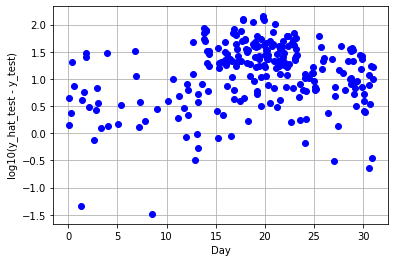

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


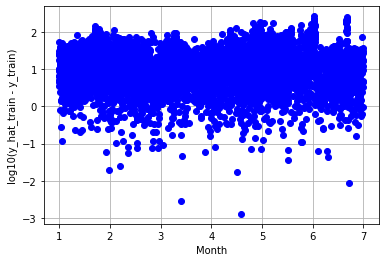

In [630]:
X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

pipeline = make_pipeline(StandardScaler(), SelectFromModel(Lasso()), GradientBoostingRegressor(max_depth = 8, learning_rate = 0.10, n_estimators = 100))

pipeline.fit(X_train, y_train)

y_hat_train = pipeline.predict(X_train) # predict training data

y_hat_test = pipeline.predict(X_test) # predict test data

R_train = pipeline.score(X_train, y_train) # Training set R²
R_test = pipeline.score(X_test, y_test) # Test set R²

best_features = X_train.columns[pipeline.named_steps['selectfrommodel'].get_support()]
feature_importances = pipeline.named_steps['gradientboostingregressor'].feature_importances_
feature_matrix = pd.DataFrame(data = {"feature_importances": feature_importances, "best_features": best_features}).sort_values(by = "feature_importances", ascending = False)

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print(feature_matrix)
print(list(feature_matrix["best_features"]))

save_predictions("GBReg", test_data, y_hat_test)

plot_diff(y_train, y_hat_train, y_test, y_hat_test)

### Histogram Gradient Boosting Regression

In [80]:
selector = make_pipeline(StandardScaler(), SelectFromModel(Lasso(alpha = alpha_lasso)))
selector.fit(X_train, y_train)

model_to_tune = HistGradientBoostingRegressor()
param_grid = {"max_depth": np.arange(1, 12, 1),
              "learning_rate": np.arange(0.01, 0.3, 0.01)}

best_params = nested_kfold_cv(model_to_tune, param_grid, selector.transform(X_train), y_train)

max_depth_HGB = best_params["max_depth"]
learning_rate_HGB = best_params["learning_rate"]

d:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.400e+05, tolerance: 1.607e+05
  model = cd_fast.enet_coordinate_descent(


Train set R²: 0.9171796629109893
Test set R²: 0.8522324151815108
Best features: Index(['Totaal_GD', 'Totaal_IK Totaal_ZPL', 'Totaal_IK Totaal_V',
       'Totaal_ZPL Totaal_GD'],
      dtype='object')


C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


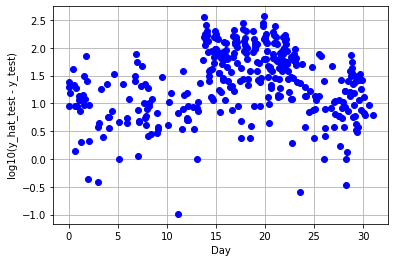

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


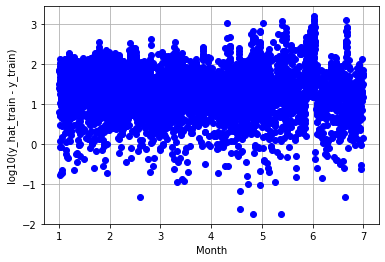

In [625]:
X_train = train_data.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data["Totaal"]
y_test = gtest_data["Totaal"]

pipeline = make_pipeline(StandardScaler(), SelectFromModel(Lasso()), HistGradientBoostingRegressor(max_depth = 10))

pipeline.fit(X_train, y_train) # fit the model on the training data
y_hat_train = pipeline.predict(X_train) # predict training data

y_hat_test = pipeline.predict(X_test) # predict test data

R_train = pipeline.score(X_train, y_train) # Training set R²
R_test = pipeline.score(X_test, y_test) # Test set R²

best_features = X_train.columns[pipeline.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

save_predictions("HGBReg", test_data, y_hat_test)

plot_diff(y_train, y_hat_train, y_test, y_hat_test)